<a href="https://colab.research.google.com/github/JALVITO/CE888/blob/master/Labs/Lab_7/Lab_7_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [1]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 45s 58ms/step - loss: 0.4519 - accuracy: 0.8544 - val_loss: 0.0608 - val_accuracy: 0.9817
Epoch 2/5
750/750 [==============================] - 44s 58ms/step - loss: 0.0574 - accuracy: 0.9824 - val_loss: 0.0506 - val_accuracy: 0.9856
Epoch 3/5
750/750 [==============================] - 44s 58ms/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.0506 - val_accuracy: 0.9850
Epoch 4/5
750/750 [==============================] - 43s 58ms/step - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0404 - val_accuracy: 0.9894
Epoch 5/5
750/750 [==============================] - 43s 58ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0519 - val_accuracy: 0.9863


#### evaluate model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 10ms/step - loss: 0.0427 - accuracy: 0.9877


0.9876999855041504

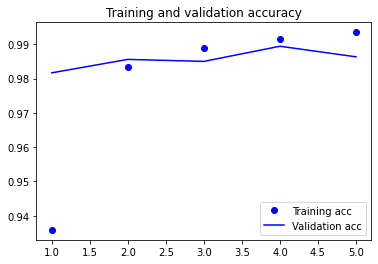

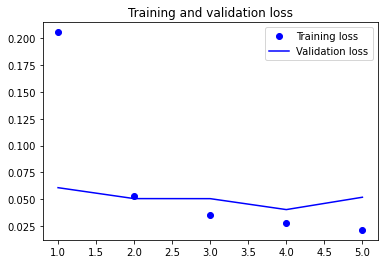

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [19]:
def create_model(optimizer='Adam', activation='relu'):
  model = models.Sequential()

  # ConvNet
  model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))

  # Classifier
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation=activation))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer=optimizer, 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [24]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

batch_size = [64, 128]
optimizer = ['RMSprop', 'Adam']
activation = ['relu', 'sigmoid']
param_grid = dict(batch_size=batch_size, optimizer=optimizer, activation=activation)

model = KerasClassifier(build_fn=create_model, epochs=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=1)
grid_result = grid.fit(train_images, train_labels)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Epoch 1/5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


750/750 [==============================] - 42s 55ms/step - loss: 0.4395 - accuracy: 0.8590
Epoch 2/5
750/750 [==============================] - 40s 54ms/step - loss: 0.0557 - accuracy: 0.9825
Epoch 3/5
750/750 [==============================] - 41s 54ms/step - loss: 0.0405 - accuracy: 0.9870
Epoch 4/5
750/750 [==============================] - 40s 54ms/step - loss: 0.0281 - accuracy: 0.9909
Epoch 5/5
188/188 [==============================] - 3s 16ms/step - loss: 0.0395 - accuracy: 0.9896
Epoch 1/5
750/750 [==============================] - 42s 54ms/step - loss: 0.4339 - accuracy: 0.8592
Epoch 2/5
750/750 [==============================] - 40s 54ms/step - loss: 0.0554 - accuracy: 0.9823
Epoch 3/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0369 - accuracy: 0.9883
Epoch 4/5
750/750 [==============================] - 40s 54ms/step - loss: 0.0264 - accuracy: 0.9913
Epoch 5/5
188/188 [==============================] - 3s 16ms/step - loss: 0.0310 - accuracy: 0.9903
Ep

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 136.0min finished


938/938 [==============================] - 54s 57ms/step - loss: 0.4227 - accuracy: 0.8666
Epoch 2/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0494 - accuracy: 0.9835
Epoch 3/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0326 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0248 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0182 - accuracy: 0.9940
Best: 0.988617 using {'activation': 'relu', 'batch_size': 64, 'optimizer': 'RMSprop'}
